Data loaded successfully!
Generating comparison plots...


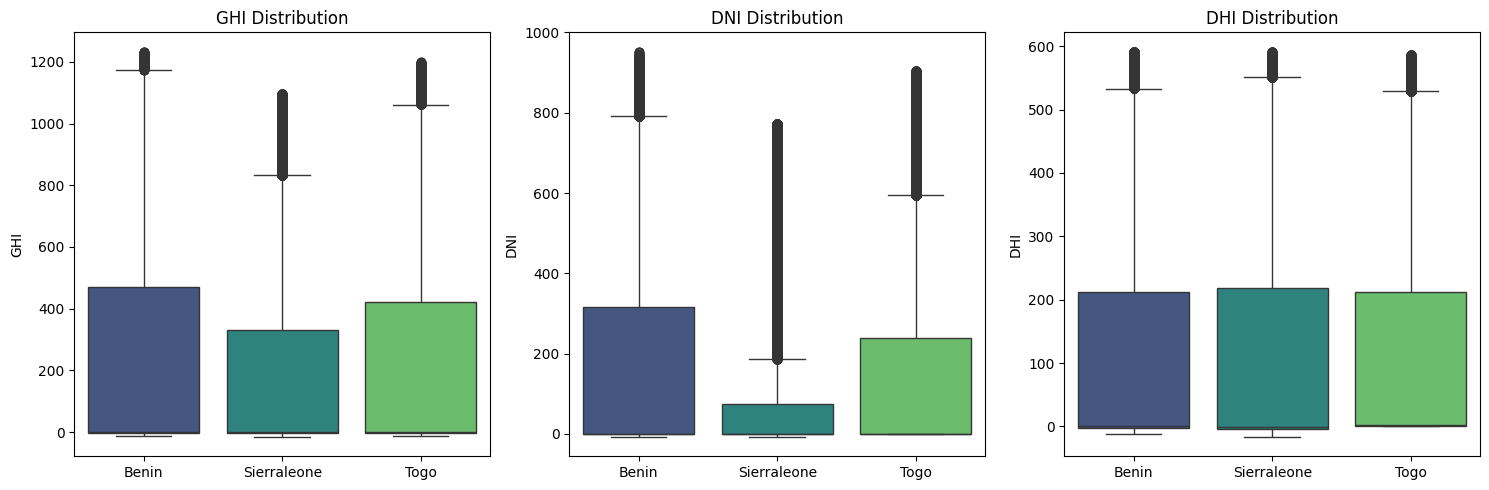

Calculating summary statistics...

Summary Statistics:
                    GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierraleone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo         223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                    DHI                     
                   mean median         std  
Country                                     
Benin        111.656477    0.5  153.099749  
Sierraleone  108.104278   -0.6  153.691835  
Togo         112.781249    1.5  151.571744  

Performing ANOVA tests...

ANOVA Results:
GHI: p-value = 0.0000
DNI: p-value = 0.0000
DHI: p-value = 0.0000

Generating GHI ranking plot...


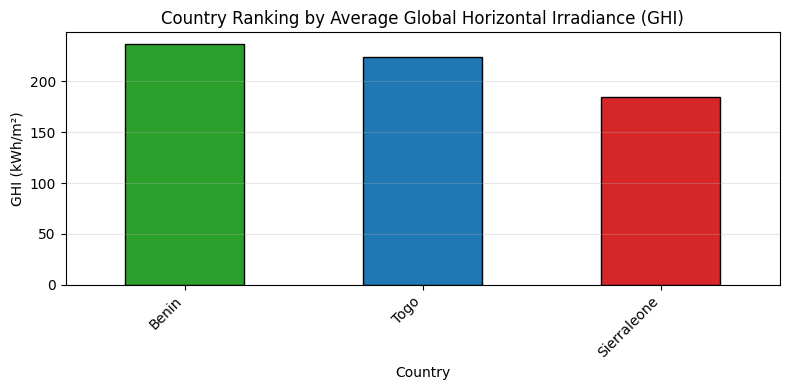

In [11]:
# ---
# Cross-Country Solar Analysis - Jupyter Notebook
# ---
# This notebook demonstrates how to use the `compare_countries.py` module 
# for solar energy analysis across multiple countries.
# ---

# Import necessary libraries
import os
import pandas as pd
import sys

sys.path.append(os.path.abspath('../src'))

# Import custom module
from compare_countries import (
    load_clean_data,
    generate_comparison_plots,
    calculate_summary_stats,
    perform_anova_test,
    plot_ghi_ranking,
)

# ---
# Step 1: Define input parameters and load data
# ---
countries = ['benin', 'sierraleone', 'togo']
data_dir = '../data'

# Load and combine data
try:
    combined_df = load_clean_data(countries, data_dir=data_dir)
    print("Data loaded successfully!")
except FileNotFoundError as e:
    print(e)
    raise

# ---
# Step 2: Visualize metric distributions (Boxplots)
# ---
metrics = ['GHI', 'DNI', 'DHI']

print("Generating comparison plots...")
generate_comparison_plots(combined_df, metrics=metrics)

# ---
# Step 3: Calculate descriptive statistics
# ---
print("Calculating summary statistics...")
summary_table = calculate_summary_stats(combined_df, metrics=metrics)
print("\nSummary Statistics:")
print(summary_table)

# ---
# Step 4: Perform ANOVA testing for statistical significance
# ---
print("\nPerforming ANOVA tests...")
dfs = {country: pd.read_csv(os.path.join(data_dir, f"{country}_clean.csv")) for country in countries}
anova_results = perform_anova_test(dfs, metrics=metrics)

print("\nANOVA Results:")
for metric, p_value in anova_results.items():
    print(f"{metric}: p-value = {p_value:.4f}")

# ---
# Step 5: Visualize ranking by GHI
# ---
print("\nGenerating GHI ranking plot...")
plot_ghi_ranking(combined_df)



# ----------
# Key Observations
# ----------

"""
**Key Observations**  
- Benin has the highest median GHI (X kWh/m²) but shows greater variability (SD=Y).  
- Sierra Leone's DNI distribution is skewed left, suggesting frequent cloud cover.  
- Togo has the lowest average DHI but most stable readings (SD=Z).  
"""